<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Birdsong Tutorial</h1> </center>

# Define Objects

In [1]:
# the following line enable interact with figures, 
# you can make zoom and save images from a poup matplotlib window
#notebook qt ipympl tk qt
%matplotlib ipympl

import birdsongs as bs
from birdsongs.utils import *

Define Path and Ploter objects

In [4]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
audios_path = "C:\\Users\\sebas\\Documents\\GitHub\\audios\\rufous-collared-sparrow\\humbolt\\"

paths  = bs.Paths()#audios_path=audios_path)              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=True)   # to save figures save=True 
#paths.data
paths.ShowFiles()

The folder has 7 songs:
0-FNJV_0007703_Physalaemus_cuvieri_Sao Roque de Minas_MG_Adao Jose Cardoso.wav
1-FNJV_0031193_Physalaemus_cuvieri_Cabreuva_SP_Gilda V. Andrade.wav
2-FNJV_0031194_Physalaemus_cuvieri_Pocos de Caldas_MG_Avelino Barrio.wav
3-humman.wav
4-XC104508 - Ocellated Tapaculo - Acropternis orthonyx.wav
5-XC11293 - Rufous-collared Sparrow - Zonotrichia capensis.wav
6-XC513182 - Rufous-collared Sparrow - Zonotrichia capensis.wav


Define, visualize and hear a birdsong object from the file number of the previous table. 
You can also define the interval time points with the function Plot but enabling the SelectTime_on option, this option does not work with pitch on

The son has 16 syllables


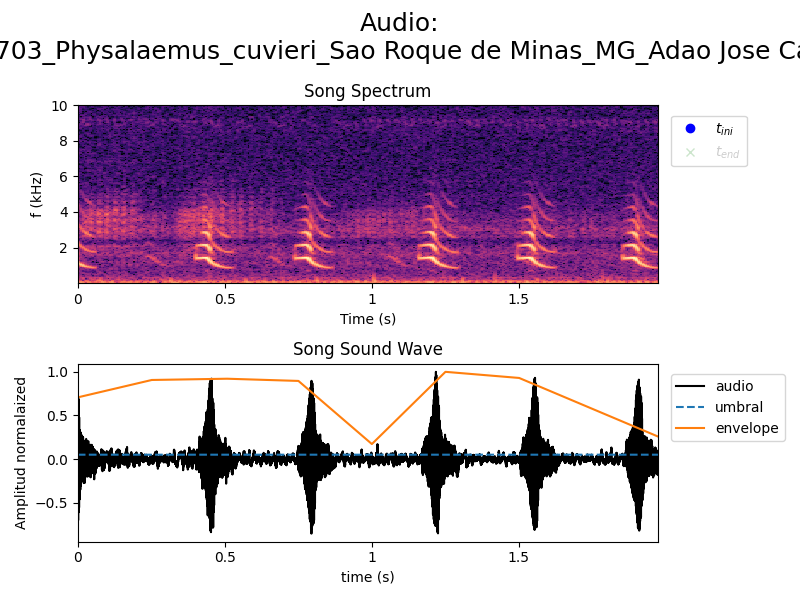

In [10]:
# no_file = int(input("Enter the number of song (0 to {0}): ".format(paths.no_files)))
birdsong = bs.BirdSong(paths, no_file=0,  umbral_FF=1.0, NN=512, flim=(1,10e3), 
                       tlim=(5,7), split_method="freq", Nt=5000, umbral=0.05,)
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

Save and show interval time points

In [11]:
time_intervals = Positions(ploter.klicker)
# time_intervals = np.array([[0.35362068, 0.49966724],
#                            [0.65662832, 0.97055046],
#                            [1.12231415, 1.3515189 ],
#                            [1.43883499, 1.61502639],
#                            [1.72105308, 1.87125755]])
print("You have selected {} syllables.".format(time_intervals.shape[0]))
[print(r"  - Syllable {}: t0 = {:.4f} s , tend = {:.4f} s".format(i, time_intervals[i,0], time_intervals[i,1])) for i in range(time_intervals.shape[0])];

You have selected 1 syllables.
  - Syllable 0: t0 = 0.7405 s , tend = 0.8663 s


In [12]:
time_intervals

array([[0.74053463, 0.86630064]])

Define, solve and plot a single syllable from the previous syllables defined

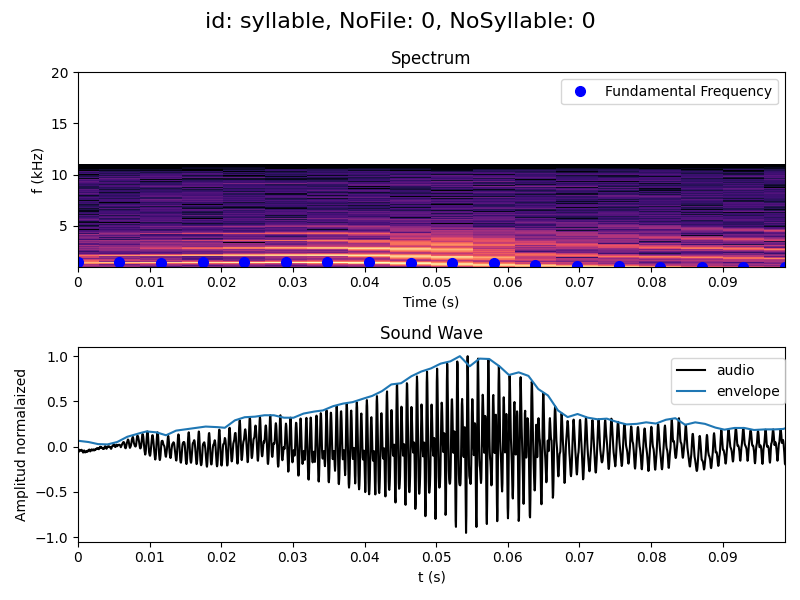

Wall time: 4.49 s


In [14]:
%%time
syllable = bs.Syllable(birdsong, tlim=time_intervals[0], ide="syllable",
                       umbral_FF=0.5, Nt=30,  flim=(1e3,20e3), NN=birdsong.NN)
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


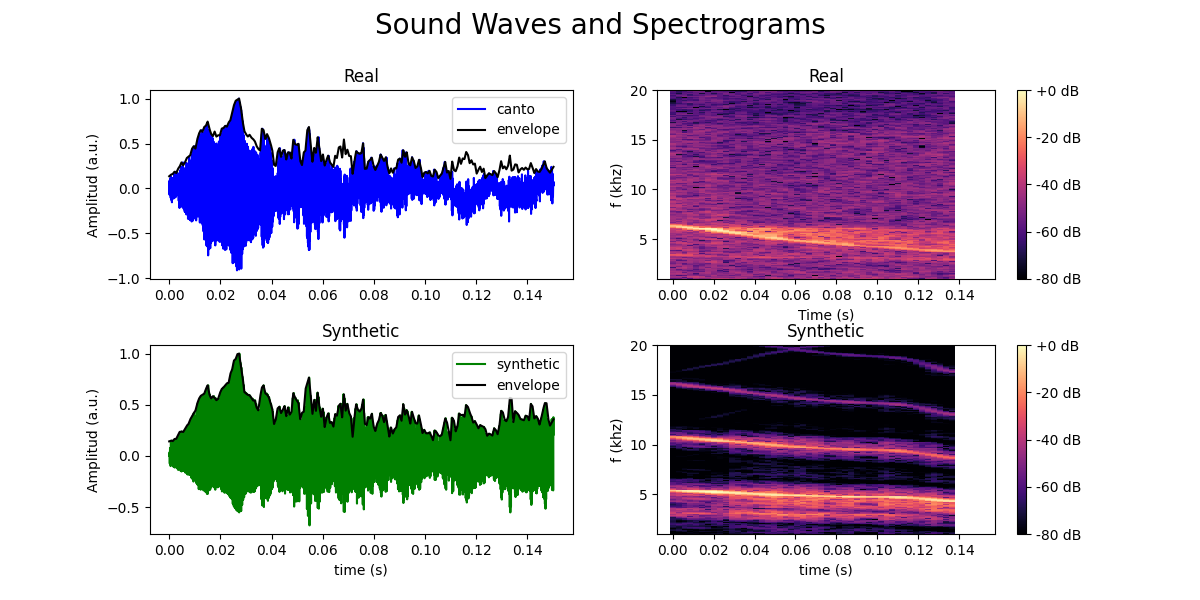

In [7]:
syllable_synth = syllable.Solve(syllable.p)

ploter.Syllables(syllable, syllable_synth)
# ploter.PlotVs(syllable_synth)
# ploter.PlotAlphaBeta(syllable_synth)
# ploter.Result(syllable, syllable_synth)
AudioPlay(syllable_synth)

# Optimization
Define the optimizer object

In [8]:
method_kwargs = {'method':'brute', 'Ns':21} 
optimizer     = bs.Optimizer(birdsong, method_kwargs=method_kwargs)

Generate the whole synthetic birdsongs defined by the previous time intervals

In [ ]:
birdsong, synth_birdsong = optimizer.SongByTimes(time_intervals, NN=256)
Display(synth_birdsong.p)

In [10]:
Display(birdsong.p)


Parameters([('a0', <Parameter 'a0', value=0.11 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.05 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=40000.0 (fixed), bounds=[10000.0:100000.0]>)])

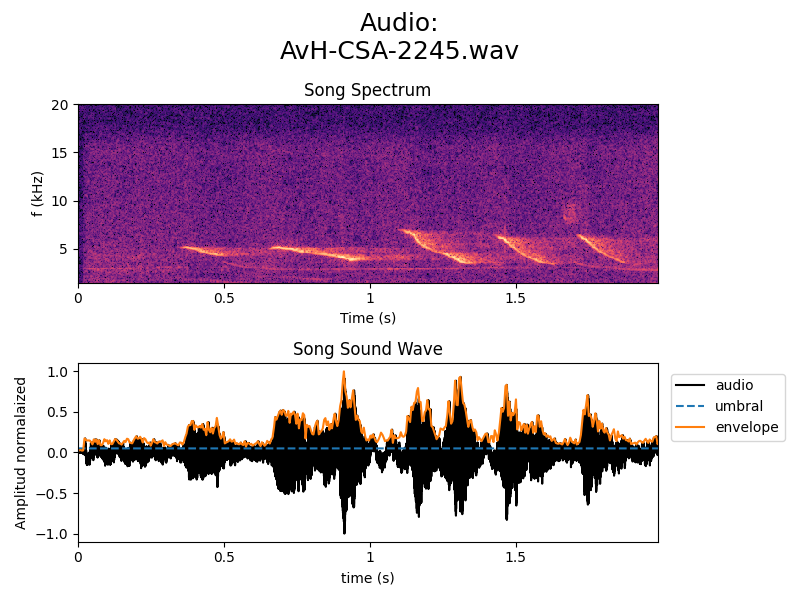

In [22]:
ploter.Plot(synth_birdsong)
# ploter.PlotAlphaBeta(synth_birdsong)

AudioPlay(synth_birdsong)

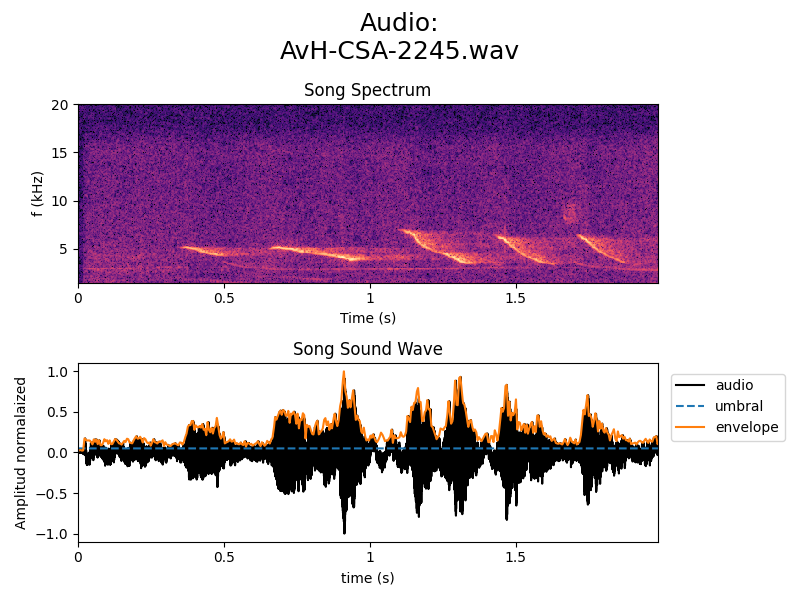

In [25]:
ploter.Plot(birdsong)
AudioPlay(birdsong)

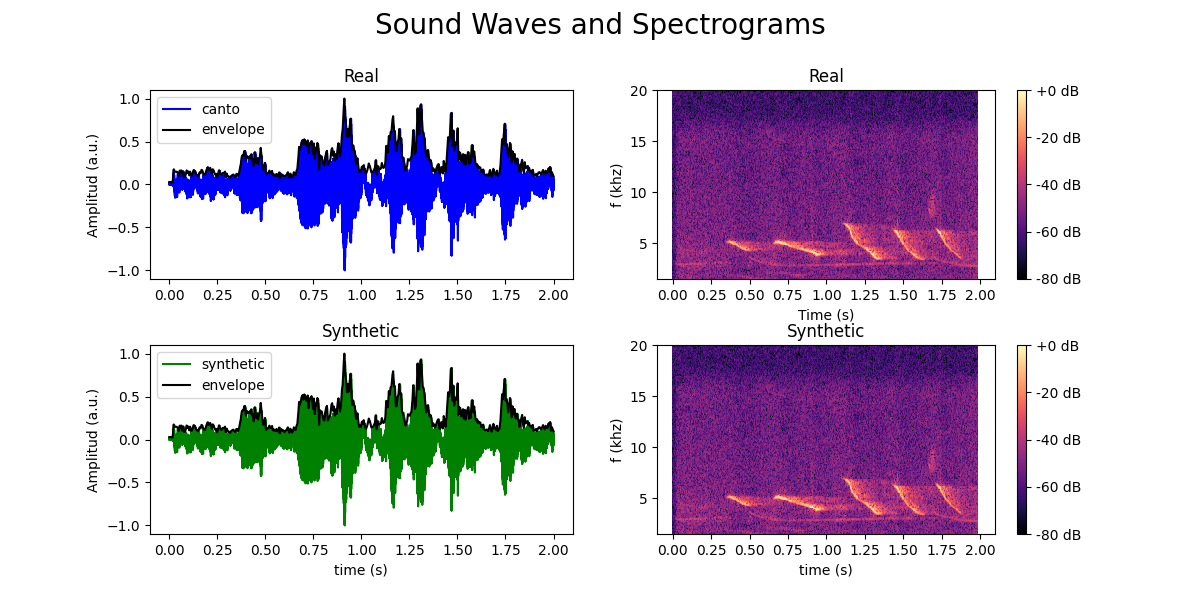

In [21]:
birdsong.no_syllable = 1
ploter.Syllables(birdsong, synth_birdsong);

Visualize and hear the whole synthetic birdsong

In [27]:
# %%time
synth_bird = synth_birdsong.SolveAB(synth_birdsong.alpha, synth_birdsong.beta, 3700)
# # synth = SolveAB(syll, synth_birdsong.alphas, synth_birdsong.betas, 3700)

C:\Users\sebas\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


In [31]:
optimizer.optimal_gamma

40600.0

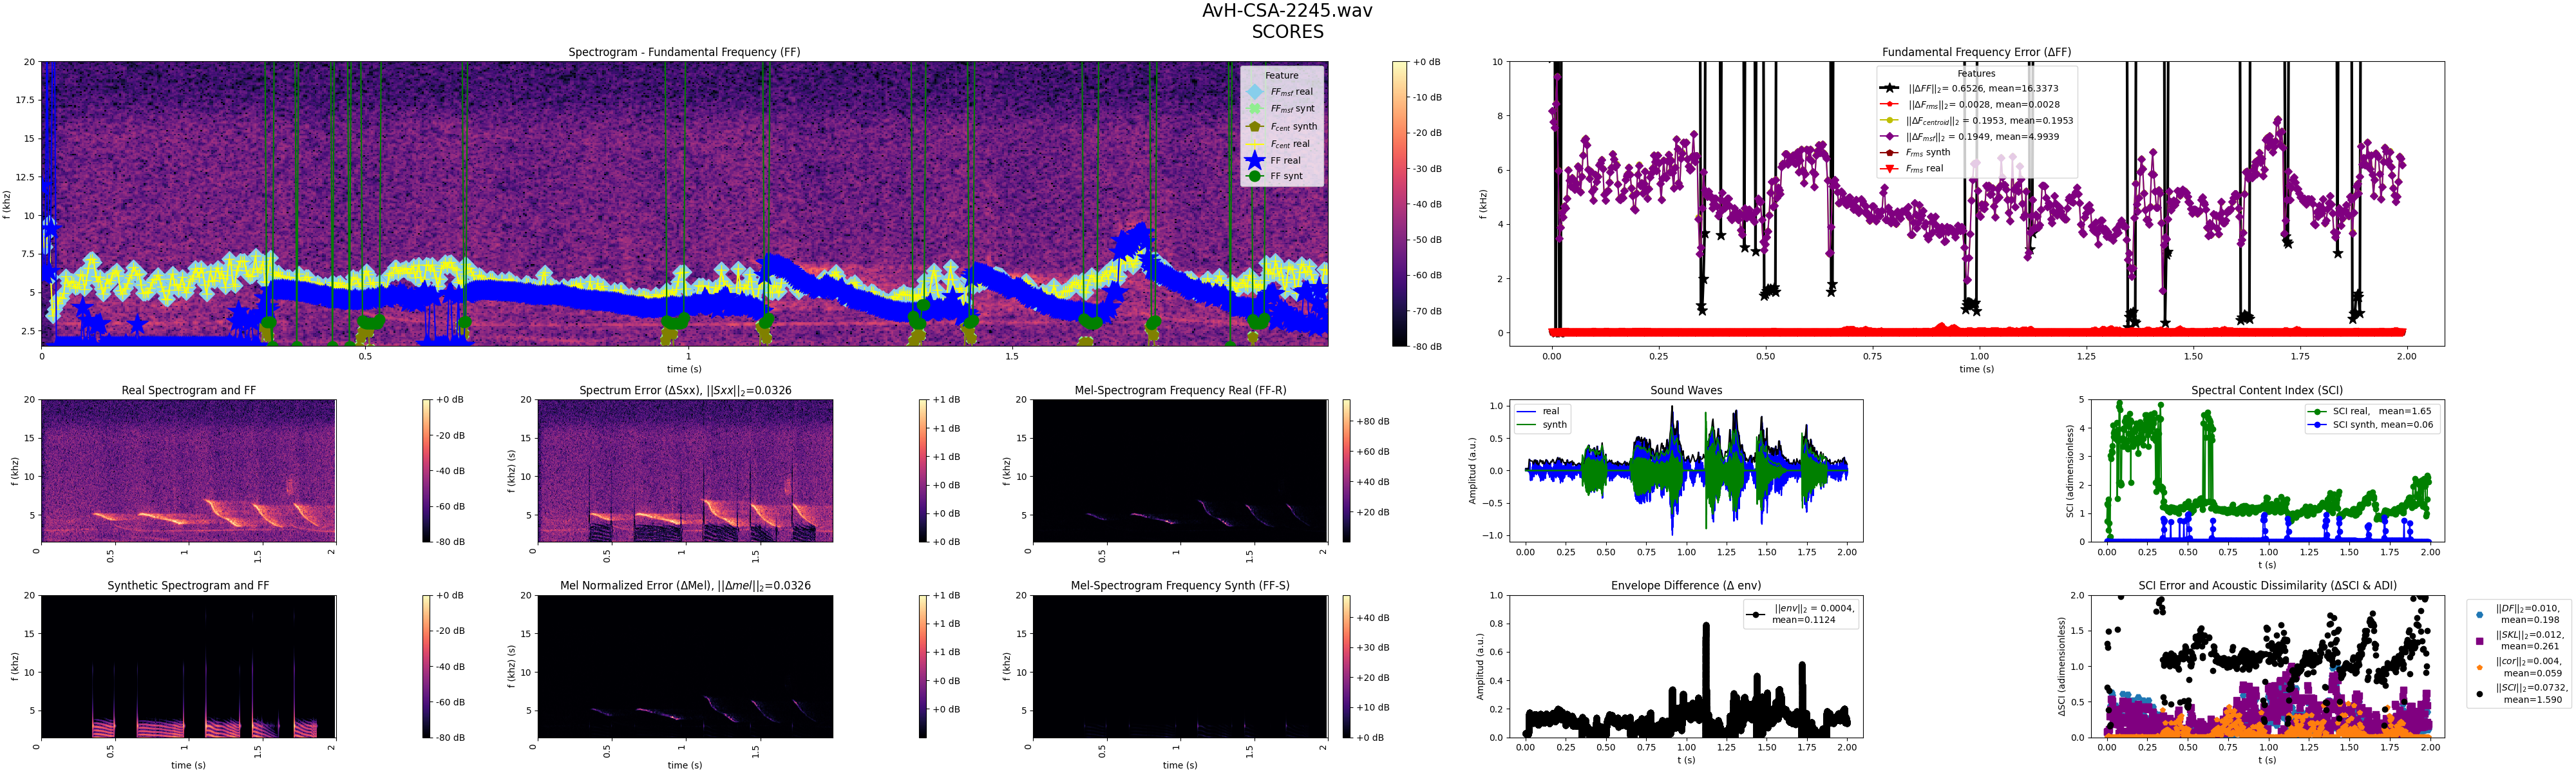

In [30]:
synth_birdsong.id = "synth-birdsong"
synth_bird.paths = paths
ploter.Result(birdsong, synth_bird)
# ploter.PlotVs(synth_bird)
AudioPlay(synth_bird)

Save the real and synthetic birdsongs as audio WAV files

In [ ]:
birdsong.WriteAudio();  synth_birdsong.WriteAudio();

In [ ]:
# optimizer.SmoothAB(time_intervals)

# plt.figure()
# # plt.plot(synth_birdsong.time_s, synth_birdsong.betas_smooth, 'o', ms=2, label="beta smooth")
# # plt.plot(synth_birdsong.time_s, synth_birdsong.alphas_smooth, 'o', ms=1, label="alpha smooth")

# plt.plot(synth_birdsong.time_s, synth_birdsong.betas, 'o', ms=2, label="betas")
# plt.plot(synth_birdsong.time_s, synth_birdsong.alphas, 'o', ms=1, label="alpha")

# plt.xlim((0,2.6)); plt.legend()
# plt.show()